In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from main import MixExpPhiStochastic, InnerGenerator, Copula, sampleInner
from phi_listing import ClaytonPhi

import matplotlib.gridspec as gridspec

%matplotlib inline

Outer generators of different parameterizations (e.g. analytic/ gen-AC) can be used interchangeably, see commented lines.

In [2]:
psi = MixExpPhiStochastic()
psi_cop = Copula(psi)
ckpt = torch.load('./checkpoints/learn_hac_CvM_OuterGen/epoch2500')
psi_cop.load_state_dict(ckpt['model_state_dict'])
psi.resample_M(1000)

#psi0 = ClaytonPhi(torch.tensor(1.0))

phi01 = InnerGenerator(psi)
phi01_cop = Copula(phi01)
ckpt = torch.load('./checkpoints/learn_hac_MLE_InnerGen01_genACphi/epoch0')
phi01_cop.load_state_dict(ckpt['model_state_dict'])
#phi01.psi = psi0

phi23 = InnerGenerator(psi)
phi23_cop = Copula(phi23)
ckpt = torch.load('./checkpoints/learn_hac_MLE_InnerGen23_genACphi/epoch3000')
phi23_cop.load_state_dict(ckpt['model_state_dict'])
#phi23.psi = psi0

phi01.resample_M(1000)
phi23.resample_M(1000)

M0 = psi.sample_M(3000).detach()
#M0 = psi0.sample_M(3000).detach()

In [6]:
psi0 = ClaytonPhi(torch.tensor(1.0))

phi01 = InnerGenerator(psi0)
phi01_cop = Copula(phi01)
ckpt = torch.load('./checkpoints/learn_hac_MLE_InnerGen01_claytonphi/epoch2500')
phi01_cop.load_state_dict(ckpt['model_state_dict'])
#phi01.psi = psi

phi23 = InnerGenerator(psi0)
phi23_cop = Copula(phi23)
ckpt = torch.load('./checkpoints/learn_hac_MLE_InnerGen23_claytonphi/epoch4000')
phi23_cop.load_state_dict(ckpt['model_state_dict'])
#phi23.psi = psi

phi01.resample_M(1000)
phi23.resample_M(1000)

M0 = psi0.sample_M(3000).detach()
#M0 = psi.sample_M(3000).detach()

In [7]:
U01 = sampleInner(phi01, 2, 3000, M0=M0).detach()
U23 = sampleInner(phi23, 2, 3000, M0=M0).detach()
U = torch.cat([U01,U23],dim=1)

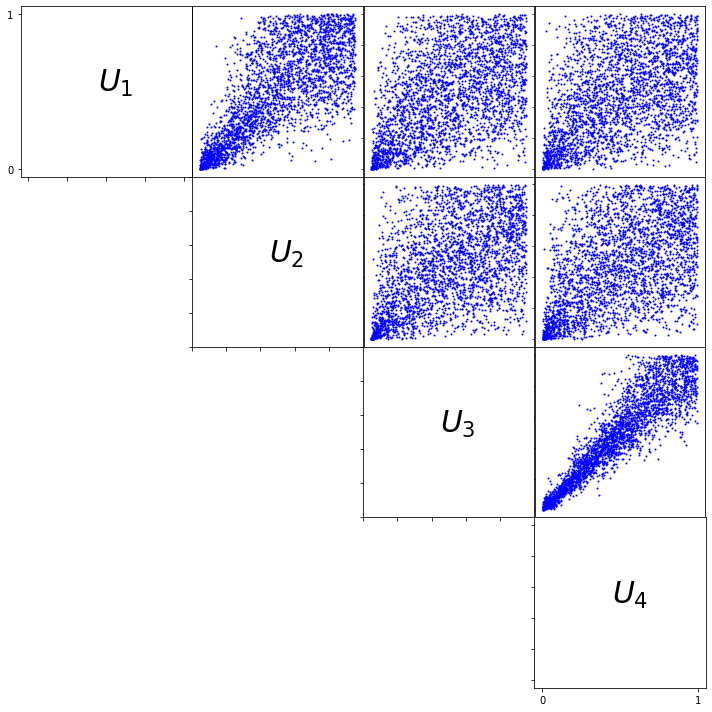

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(10,10))

gs = gridspec.GridSpec(4, 4,
         wspace=0.0, hspace=0.0) 

ax = plt.subplot(gs[0,1])
ax.scatter(U[:,0], U[:,1],s=1,c='blue')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.axis('square'); ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[0,2])
ax.scatter(U[:,0], U[:,2],s=1,c='blue')
ax.axis('square'); ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[0,3])
ax.scatter(U[:,0], U[:,3],s=1,c='blue')
ax.axis('square'); ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[1,2])
ax.scatter(U[:,1], U[:,2],s=1,c='blue')
ax.axis('square'); ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[1,3])
ax.scatter(U[:,1], U[:,3],s=1,c='blue')
ax.axis('square'); ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[2,3])
ax.scatter(U[:,2], U[:,3],s=1,c='blue')
ax.axis('square'); ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[0,0])
ax.text(0.45,0.5,'$U_1$',fontsize=30); ax.axis([xmin, xmax, ymin, ymax])
ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_yticks([0,1]); ax.set_yticklabels([0,1])

ax = plt.subplot(gs[1,1])
ax.text(0.45,0.5,'$U_2$',fontsize=30); #ax.axis([xmin, xmax, ymin, ymax])
ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[2,2])
ax.text(0.45,0.5,'$U_3$',fontsize=30); #ax.axis([xmin, xmax, ymin, ymax])
ax.set_xticklabels([]); ax.set_yticklabels([])

ax = plt.subplot(gs[3,3])
ax.text(0.45,0.5,'$U_4$',fontsize=30); ax.axis([xmin, xmax, ymin, ymax])
ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_xticks([0,1]); ax.set_xticklabels([0,1])

plt.tight_layout()
plt.show()
plt.clf()